In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
file_path = "COVID-19 Global Statistics Dataset.csv"
column_names = [
    "Country",
    "Total Cases",
    "New Cases",
    "Total Deaths",
    "New Deaths",
    "Total Recovered",
    "New Recovered",
    "Active Cases",
    "Serious, Critical",
    "Tot Cases/1M pop",
    "Deaths/1M pop",
    "Total Tests",
    "Tests/1M pop",
    "Population"
]

# Read the CSV into a DataFrame
df = pd.read_csv(file_path, names=column_names)

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("COVID-19 Global Statistics Dataset.csv")

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Data types of columns
print("\nData types of columns:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Unique values in categorical columns
categorical_columns = ["Country"]
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

First few rows of the dataframe:
   Country  Total Cases New Cases Total Deaths  New Deaths Total Recovered  \
0      USA  111,367,209       NaN    1,199,031         NaN     109,053,249   
1    India   45,028,429       161      533,475         2.0             NaN   
2   France   40,138,560       NaN      167,642         NaN      39,970,918   
3  Germany   38,819,284       574      182,439        28.0      38,240,600   
4   Brazil   38,407,327       NaN      709,765         NaN      36,249,161   

  New Recovered Active Cases Serious, Critical Tot Cases/1M pop Deaths/1M pop  \
0           NaN    1,114,929             1,771          332,633         3,581   
1           NaN          NaN               NaN           32,012           379   
2           NaN            0               NaN          612,013         2,556   
3           NaN      396,245               NaN          462,776         2,175   
4           NaN    1,448,401               NaN          178,345         3,296   

     Total 

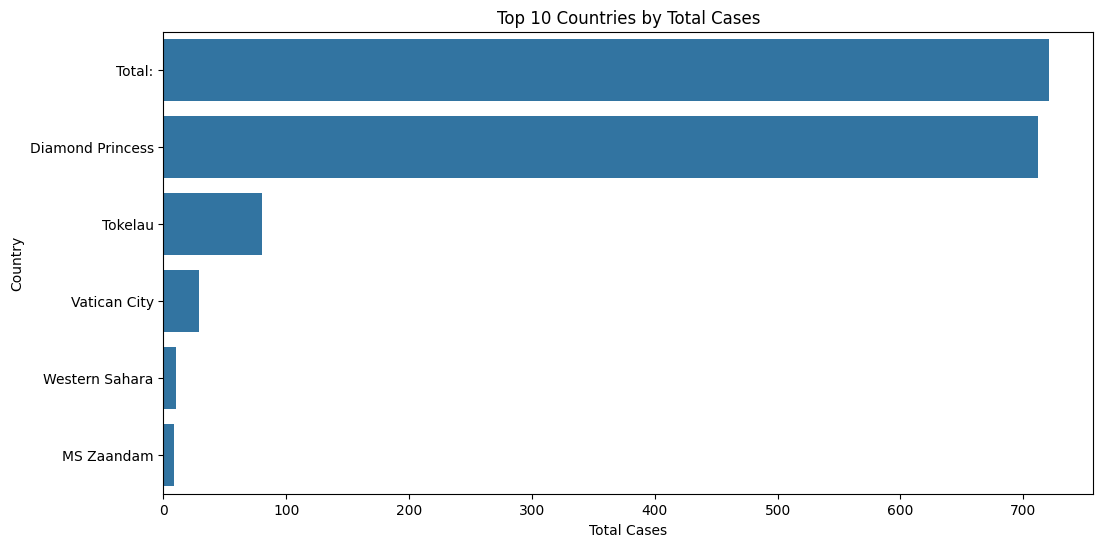

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Total Cases' to numeric
df['Total Cases'] = pd.to_numeric(df['Total Cases'], errors='coerce')

# Drop rows with missing 'Total Cases' values
df.dropna(subset=['Total Cases'], inplace=True)

# Sort the dataframe by 'Total Cases' and select top 10 countries
top_countries = df.sort_values(by='Total Cases', ascending=False).head(10)

# Create a bar plot of total cases by country
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Cases', y='Country', data=top_countries)
plt.title('Top 10 Countries by Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

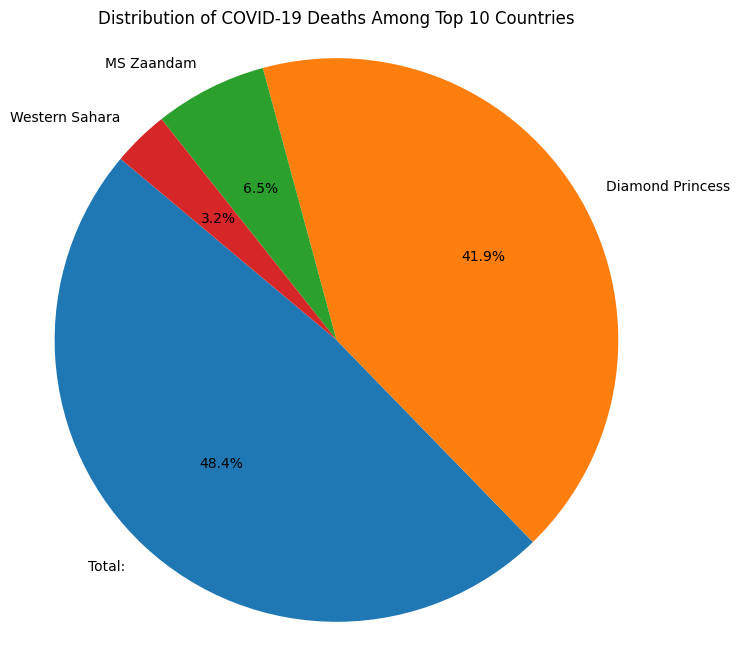

In [ ]:
df['Total Deaths'] = pd.to_numeric(df['Total Deaths'], errors='coerce')

# Drop rows with missing 'Total Deaths' values
df.dropna(subset=['Total Deaths'], inplace=True)

# Sort the dataframe by 'Total Deaths' and select top 10 countries
top_countries_deaths = df.sort_values(by='Total Deaths', ascending=False).head(10)

# Create a pie chart to show the distribution of COVID-19 deaths among the top countries
plt.figure(figsize=(8, 8))
plt.pie(top_countries_deaths['Total Deaths'], labels=top_countries_deaths['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of COVID-19 Deaths Among Top 10 Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
pip install geopandas matplotlib

<ipython-input-9-e8f53e745899>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


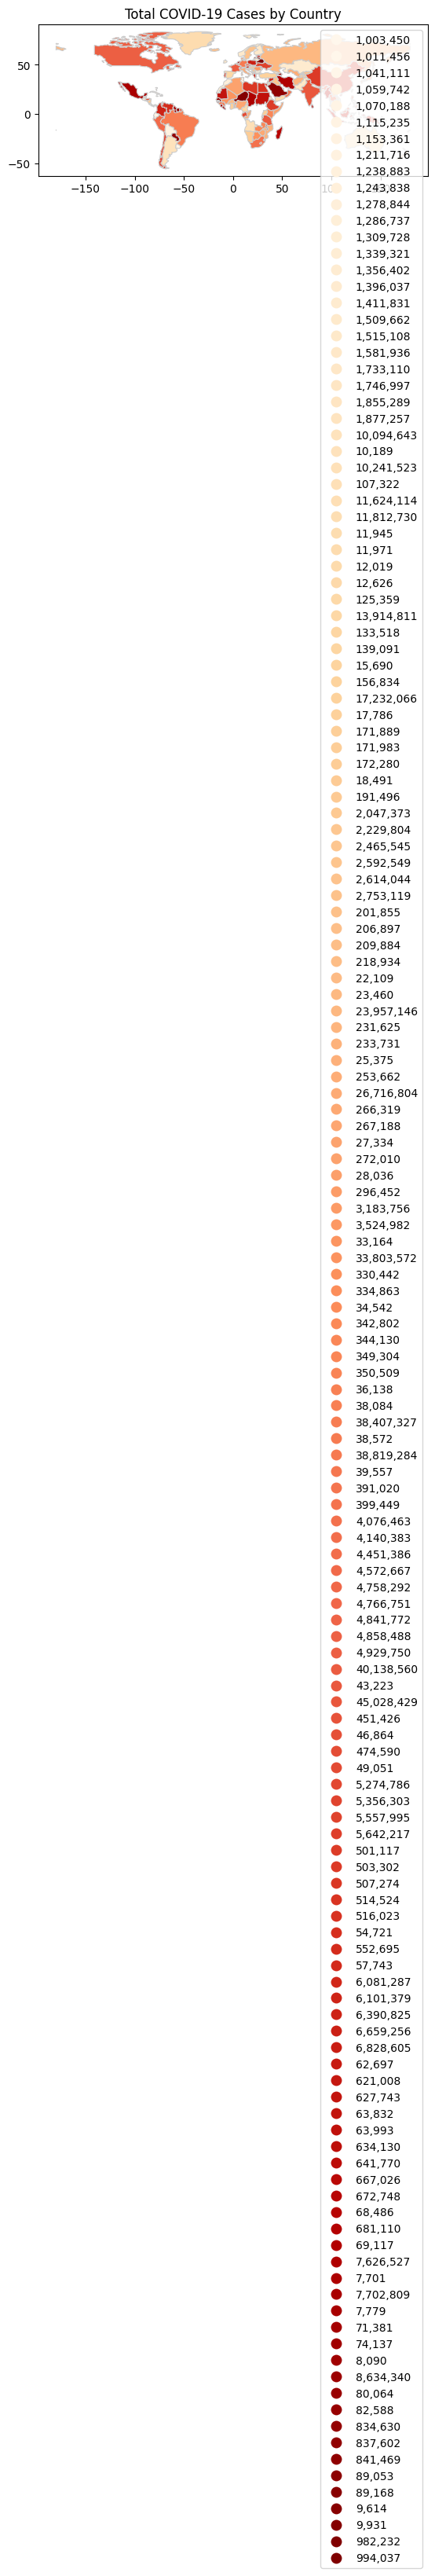

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load your CSV data
csv_data = pd.read_csv("COVID-19 Global Statistics Dataset.csv")

# Merge the world map with your CSV data
merged_data = world.merge(csv_data, how='left', left_on='name', right_on='Country')

# Plot the merged data
merged_data.plot(column='Total Cases', cmap='OrRd', linewidth=0.8, edgecolor='0.8', legend=True)
plt.title('Total COVID-19 Cases by Country')
plt.show()

Accuracy of Random Forest classifier: 0.9791666666666666


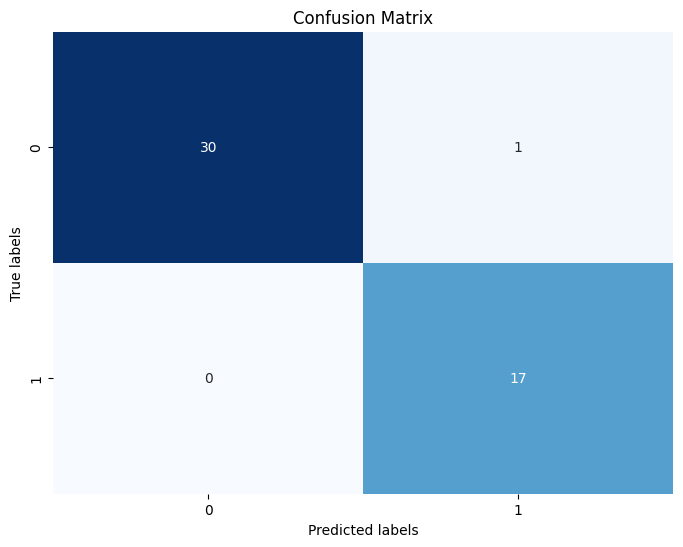

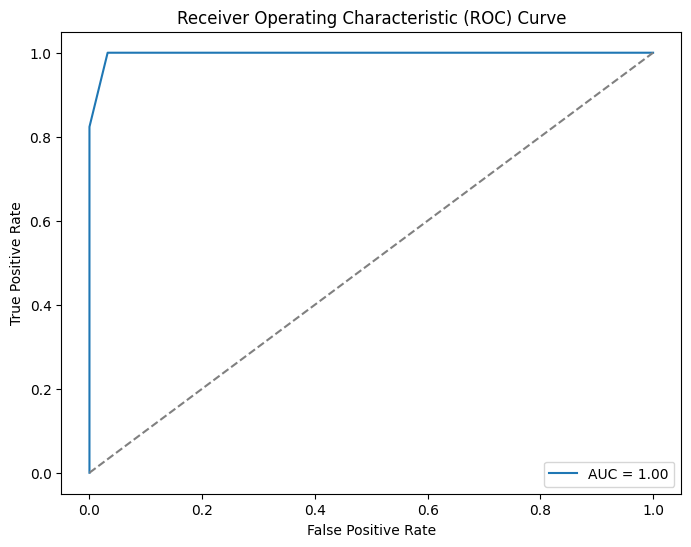

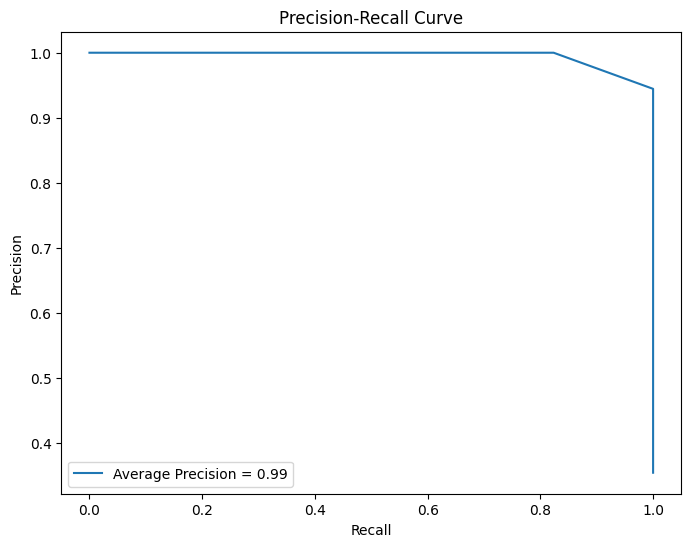

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Load the dataset
df = pd.read_csv("COVID-19 Global Statistics Dataset.csv")

# Remove commas from numeric columns and convert to numeric
numeric_columns = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases']
for col in numeric_columns:
    df[col] = df[col].str.replace(',', '').astype(float)

# Choose predictor variables (features)
X = df[['Total Deaths', 'Total Recovered', 'Active Cases']]

# Define the target variable
threshold = 1000000  # Threshold to define high total cases
df['High Total Cases'] = (df['Total Cases'] > threshold).astype(int)
y = df['High Total Cases']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values by imputing with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_imputed, y_train)

# Predict the target variable for the test set
y_pred = rf_classifier.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest classifier:", accuracy)

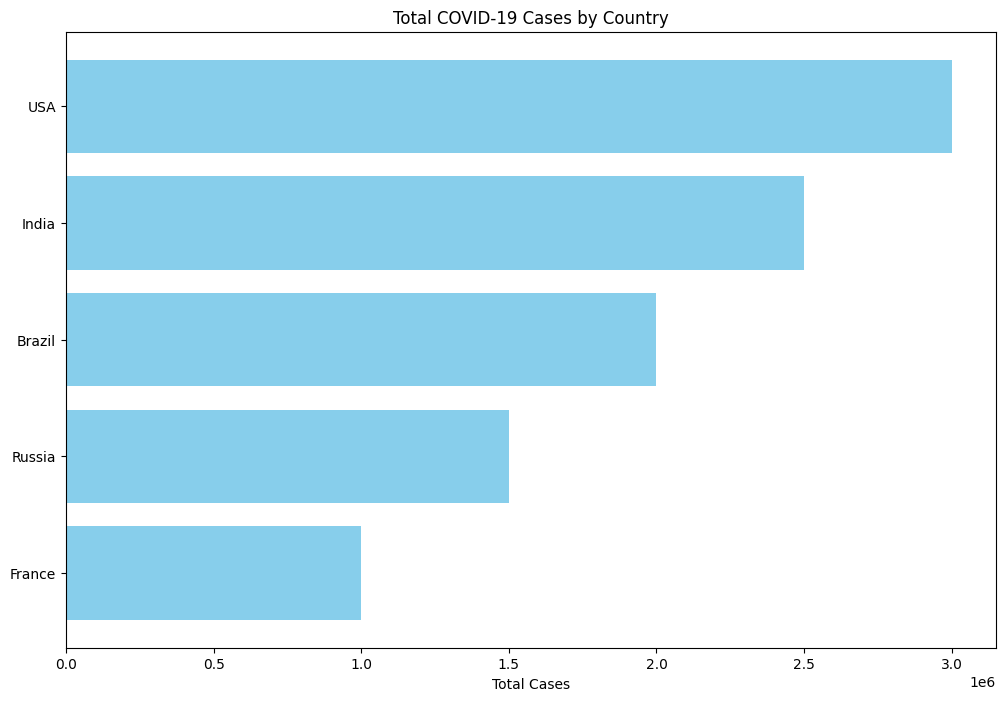

In [ ]:
import matplotlib.pyplot as plt

# Sample data
data = {
    'Country': ['USA', 'India', 'Brazil', 'Russia', 'France'],
    'Total Cases': [3000000, 2500000, 2000000, 1500000, 1000000]
}

# Extracting country names and total cases
countries = data['Country']
total_cases = data['Total Cases']

# Plotting the data
plt.figure(figsize=(12, 8))
plt.barh(countries, total_cases, color='skyblue')
plt.xlabel('Total Cases')
plt.title('Total COVID-19 Cases by Country')
plt.gca().invert_yaxis()  # Invert y-axis to have countries with highest cases at the top
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Accuracy of Logistic regression: 87.5


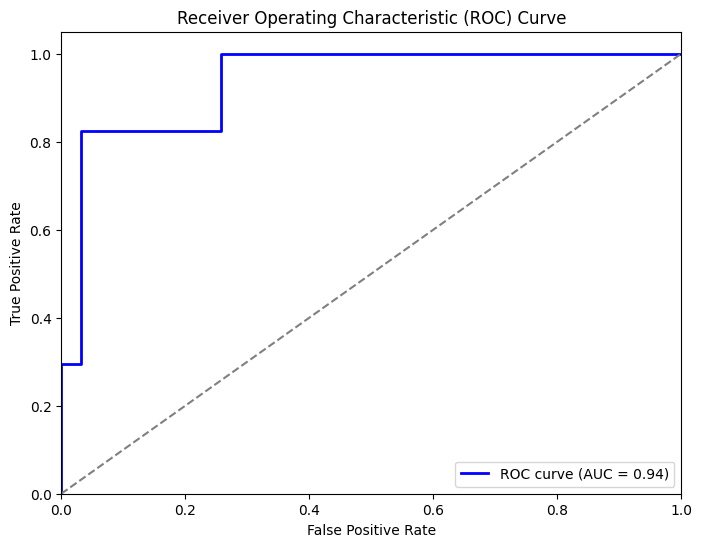

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv("COVID-19 Global Statistics Dataset.csv")

# Replace commas in numeric columns and convert to float
numeric_columns = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases']
for col in numeric_columns:
    df[col] = df[col].str.replace(',', '').astype(float)

# Define features (X) and target variable (y)
X = df[['Total Deaths', 'Total Recovered', 'Active Cases']]
y = (df['Total Cases'] > 1000000).astype(int)  # Binary classification based on threshold

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with mean for numeric columns only
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X.columns)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize the logistic regression model
log_reg_model = LogisticRegression(penalty='l2', solver='lbfgs')

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_log_reg_model = grid_search.best_estimator_

# Predict on the testing data
y_pred = best_log_reg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of Logistic regression:", accuracy*100)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtain probabilities of the positive class predictions
y_prob = best_log_reg_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Example values for the number of neighbors
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)
grid_search_knn.fit(X_train_scaled, y_train)
best_knn_model = grid_search_knn.best_estimator_

# Predict on the testing data
y_pred_knn = best_knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Accuracy of KNN:", accuracy_knn*100)

Accuracy of KNN: 93.75


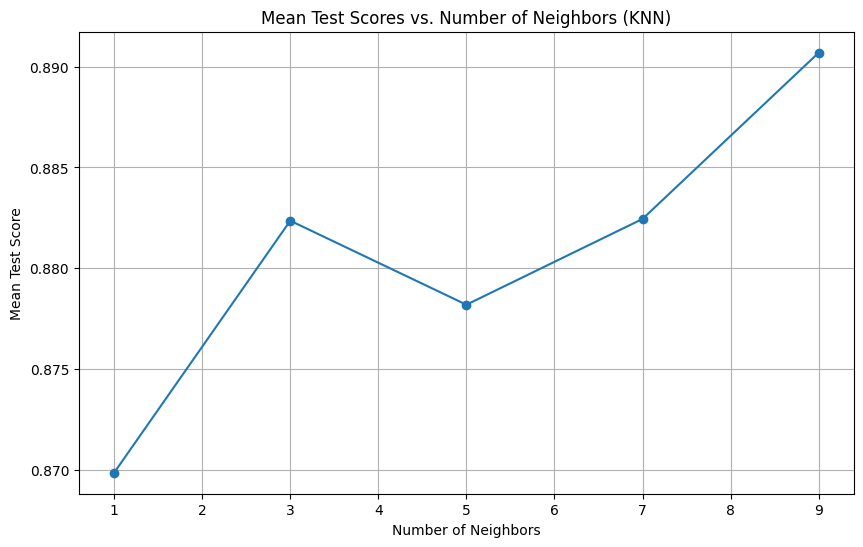

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("COVID-19 Global Statistics Dataset.csv")

# Replace commas in numeric columns and convert to float
numeric_columns = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases']
for col in numeric_columns:
    df[col] = df[col].str.replace(',', '').astype(float)

# Define features (X) and target variable (y)
X = df[['Total Deaths', 'Total Recovered', 'Active Cases']]
y = (df['Total Cases'] > 1000000).astype(int)  # Binary classification based on threshold

# Impute missing values with mean for numeric columns only
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Define the parameters grid for KNN
param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 9]}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Grid search with cross-validation
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5)
grid_search_knn.fit(X_scaled, y)

# Extracting the mean test scores from the grid search results
mean_test_scores = grid_search_knn.cv_results_['mean_test_score']

# Plotting the mean test scores against the number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(param_grid_knn['n_neighbors'], mean_test_scores, marker='o', linestyle='-')
plt.title('Mean Test Scores vs. Number of Neighbors (KNN)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()